# Project Overview:

### Introduction:

Netflix is a popular subscription-based streaming platform that allows members to watch TV shows and movies on an internet-connected device. Users can also download TV shows and movies to their devices and watch it without internet connection. You can watch a variety of award-winning Netflix originals, TV shows, movies, documentaries, and more. With its rapid growth and diverse content offerings, it becomes crucial to leverage data analysis to understand viewer preferences, trends, and patterns. 

Netflix also have recommendation on TV shows and movies for their users to watch. The more you watch, the better Netflix gets at recommending TV shows and movies. So, this project is an implementation of recommendation system on Netflix dataset to predict similar TV shows and Movies based on its description genre for enhancing user satisfaction.

Github URL of this project: https://github.com/Srujanaprahlad/Unsupervised-Learning

### Goals:

1. To understand what content is available in different countries
2. To examine how Netflix content has evolved over the years.
3. To investigate if certain countries or regions have specific preferences or produce distinct types of content.
4. To propose strategies for content recommendation based on data insights.
5. To check what percentage of movies or TV shows on netflix are inspired from books.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity

#### Data Preprocessing:

Data utilized for this project is provided at https://www.kaggle.com/datasets/shivamb/netflix-shows/data. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, Genre etc. It has 8807 rows and 12 columns.

In [2]:
data = pd.read_csv('/Users/srujanapalli/Desktop/netflix_titles.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


We notice that, most of the columns are text and some columns have missing values. Only release_year column has numerical data. 

In [4]:
books = pd.read_csv('/Users/srujanapalli/Desktop/books.csv')
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

We notice that most of the columns have no missing values. We need to find any duplicate values and missing values are present.

### Exploratory Data Analysis

In [6]:
print(data.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool


In [7]:
print(books.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


data and books does not have any duplicate values.

In [8]:
print(data.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


`director` column of the data has most number of missing values (2634) followed by `country` and `cast` columns with 831 and 825 missing values respectively.

In [9]:
print(books.isnull().sum())

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64


`language_code`,`isbn`,`isbn13`,`original_title` column has most number of missing values. 

`date_added` column is in the format of Month-Date-Year where month is a string. In order to make our calculations easier, we need to convert into datetime64 format using datatime library.

In [10]:
data["date_added"] = pd.to_datetime(data['date_added'], format='%B %d, %Y', errors='coerce')
data['Month_uploaded']= data['date_added'].dt.month
data['Year_uploaded'] = data['date_added'].dt.year
data['MonthName']= data['date_added'].dt.month_name()
data["date_added"]

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In order to fill the missing values, we replace the values by NA. We drop the rows in `rating`, `duration` and `date_added` which have missing values.

In [11]:
data = data.dropna(thresh=3)

data.dropna(subset=['rating', 'duration','date_added'], inplace=True)
data['director'].replace(np.nan, 'NA',inplace  = True)
data['cast'].replace(np.nan, 'NA',inplace  = True)
data['country'].replace(np.nan, 'NA',inplace  = True)

books.drop_duplicates(subset='original_title',keep=False,inplace=True)

In [12]:
data.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
Month_uploaded    0
Year_uploaded     0
MonthName         0
dtype: int64

data has no missing values.

Text(0.5, 0, 'Release Year')

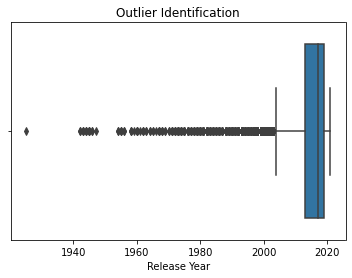

In [13]:
sns.boxplot(x=data['release_year'])
plt.title('Outlier Identification')
plt.xlabel('Release Year')

In [14]:
Q1 = data['release_year'].quantile(0.25) 
Q3 = data['release_year'].quantile(0.75)
IQR = Q3 - Q1 

lowOutlier = Q1 - 1.5 * IQR
highOutlier = Q3 + 1.5 * IQR
totalOutlier = ((data['release_year'] < lowOutlier) | (data['release_year'] > highOutlier)).sum()
print("Total Number of the Outliers in the release_year are {}".format(totalOutlier))


Total Number of the Outliers in the release_year are 711


There are a total of 711 outliers. Removing outliers can lead to a more robust analysis, hence we will remove the outliers.

In [15]:
data = data[(data["release_year"] < highOutlier) & (data["release_year"] > lowOutlier)]

totalOutlier = ((data['release_year'] < lowOutlier) | (data['release_year'] > highOutlier)).sum()
print("Total Number of Outliers in the release_year are {}".format(totalOutlier))


Total Number of Outliers in the release_year are 0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7927 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         7927 non-null   object        
 1   type            7927 non-null   object        
 2   title           7927 non-null   object        
 3   director        7927 non-null   object        
 4   cast            7927 non-null   object        
 5   country         7927 non-null   object        
 6   date_added      7927 non-null   datetime64[ns]
 7   release_year    7927 non-null   int64         
 8   rating          7927 non-null   object        
 9   duration        7927 non-null   object        
 10  listed_in       7927 non-null   object        
 11  description     7927 non-null   object        
 12  Month_uploaded  7927 non-null   float64       
 13  Year_uploaded   7927 non-null   float64       
 14  MonthName       7927 non-null   object        
dtypes: d

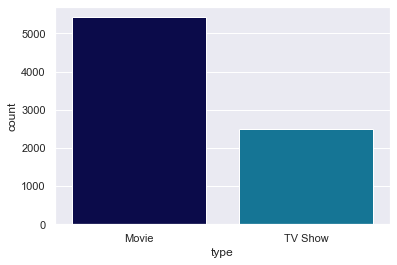

In [17]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=data, palette="ocean")

This bar plot shows the distribution of content types (movies and TV shows) on Netflix. There are 5427 records of movies and 2500 records of TV shows in the data. The key insights from this plot is that higher number of movies could suggest a focus on diverse, one-time content, while more TV shows might indicate a strategy to keep viewers engaged over longer periods.

Let us take a look at the data of content type available in both both movies and tv shows according to ratings. 

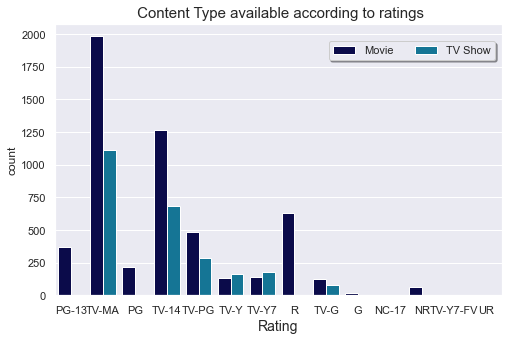

In [18]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=data, x='rating', hue='type', palette='ocean')
plt.title(' Content Type available according to ratings', fontsize=15)
plt.xlabel('Rating', fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(0.600,0.90),
          ncol=3, fancybox=True, shadow=True)
plt.show()

Let's take a look at the data based on countries which have highest number of content available. Here, we visualize the distribution of content ratings. This plot is essential to understand the target audience for Netflix content and how it aligns with the platform's content strategy.

A concentration of mature content might suggest targeting an older audience, while more family-friendly ratings indicate a broader target demographic. This information can be beneficial to the industry leader in deciding the distribution of content in respect of the rating of viewers according to the available content. Additionally, it is helpful for people to analyse the movies and tv shows content in respect of the rating they got from the authorized certification committee.


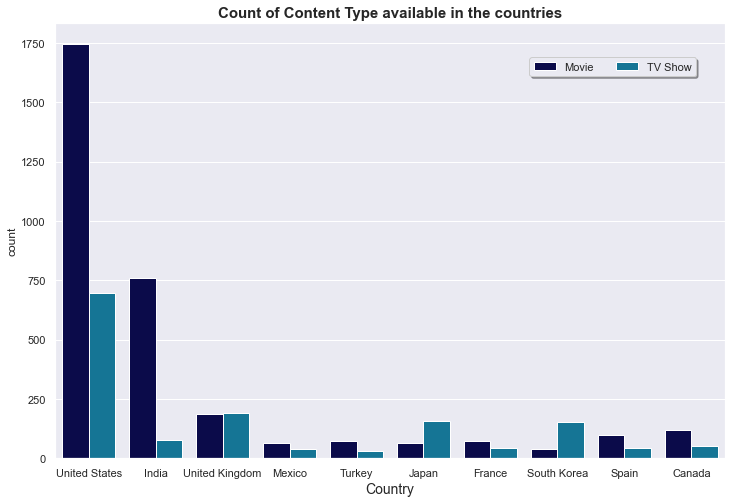

In [19]:
country_top_content = data.query('country == ["United States", "India", "United Kingdom", "Japan", "South Korea", "Canada", "Spain", "France", "Mexico", "Turkey"]')
country_top_content.head()

plt.figure(figsize=(12,8))
ax=sns.countplot(data=country_top_content, x='country',hue = 'type', palette='ocean')
plt.title('Count of Content Type available in the countries', fontsize=15, fontweight="bold")
ax.legend(loc='center left', bbox_to_anchor=(0.70,0.90),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel('Country', fontsize=14)
plt.show()

The above plot represents the content according to their types, it can be inference that Japan, South Korea and the United Kingdom are the only countries in which TV shows have more content than movies; it can be thought of as the people tend to watch more TV shows than movies in these countries. In contrast, the content available on Netflix is majorly movies.

Observe variations in content across different regions. This can reveal Netflix's market-specific strategies, such as focusing on local content in certain regions to cater to cultural preferences. By visualising the content available according to the geographical data, it would be beneficial to industry leaders to decide which type of content is famous and liked by people to watch in which region.




Text(0.5, 0, 'Release Year')

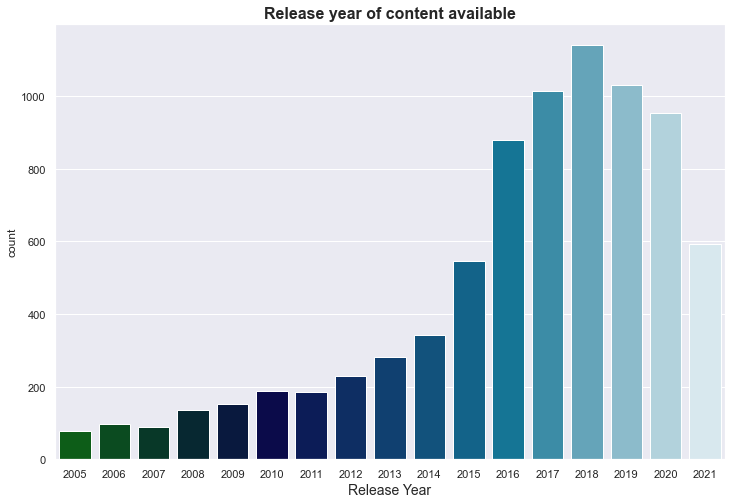

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x='release_year', data=data, palette='ocean')

plt.show
plt.title('Release year of content available', fontsize=16, fontweight="bold")
plt.xlabel('Release Year', fontsize=14)

The graph shows that every year the content released gets increased except the year 2019, 2020 and 2021 which is due to the pandemic of coronavirus. 

Observing the distribution of content by release year can reveal trends in content production over time. For instance, a recent uptick in the number of titles released might indicate an increase in content creation or acquisition by Netflix. This can also be reflective of the overall growth in the entertainment industry.



Text(0.5, 0, 'Year uploaded at Netflix')

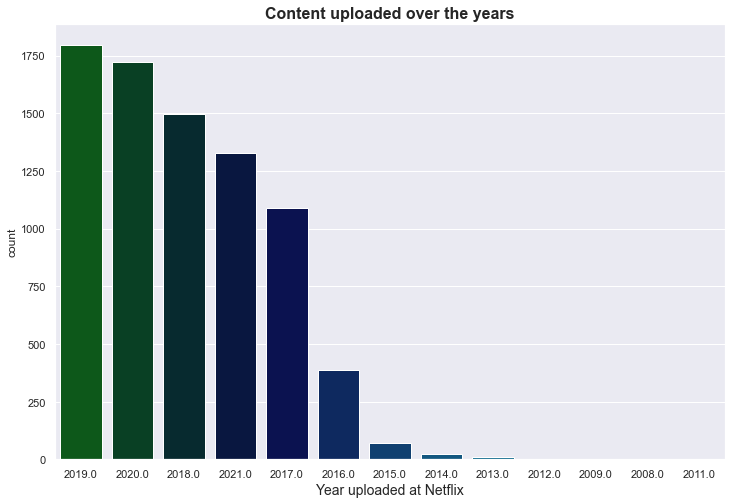

In [21]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Year_uploaded", data=data, palette="ocean",
                  order = data["Year_uploaded"].value_counts().index)
plt.show
plt.title('Content uploaded over the years', fontsize=16, fontweight="bold")
plt.xlabel('Year uploaded at Netflix', fontsize=14)

Analyzing the content upload year can provide insights into Netflix's content acquisition and release strategy. A lag between release year and upload year could suggest a strategy of acquiring older titles, while a shorter lag or same-year uploads indicate a focus on fresh, newly released content. Additionally, a significant increase in uploads during certain years might correlate with business growth phases, market expansions, or competitive responses.

It is evident from the above plot that content uploaded on Netflix is in recent years stating the information that people like to watch few old movies on Netflix. Moreover, the same pattern of content reduction in years 2020 and 2021 can be seen in the uploading of content. This information can help industry advisors in deciding which content to upload to Netflix.

In [22]:
net_movies = data[data['type'] == 'Movie']

net_movies['duration']=net_movies['duration'].str.replace(' min','')
net_movies['duration'] = pd.to_numeric(net_movies['duration'], errors='coerce').astype('Int64')


/var/folders/6k/j6972thx1t783_9nc09xw1rc0000gn/T/ipykernel_5047/4288943018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_movies['duration']=net_movies['duration'].str.replace(' min','')
/var/folders/6k/j6972thx1t783_9nc09xw1rc0000gn/T/ipykernel_5047/4288943018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_movies['duration'] = pd.to_numeric(net_movies['duration'], errors='coerce').astype('Int64')


<AxesSubplot:xlabel='duration', ylabel='Density'>

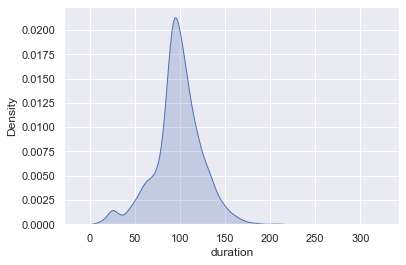

In [23]:
sns.set(style="darkgrid")
sns.kdeplot(data = net_movies['duration'], shade=True)

A good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting.

/var/folders/6k/j6972thx1t783_9nc09xw1rc0000gn/T/ipykernel_5047/3214620782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_shows['country'] = net_shows['country'].fillna('Unknown')
/var/folders/6k/j6972thx1t783_9nc09xw1rc0000gn/T/ipykernel_5047/3214620782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_shows['duration'] = net_shows['duration'].str.replace(' Season','')
/var/folders/6k/j6972thx1t783_9nc09xw1rc0000gn/T/ipykernel_5047/3214620782.py:5: SettingWithCopyWarning: 
A value is trying 

<AxesSubplot:xlabel='title'>

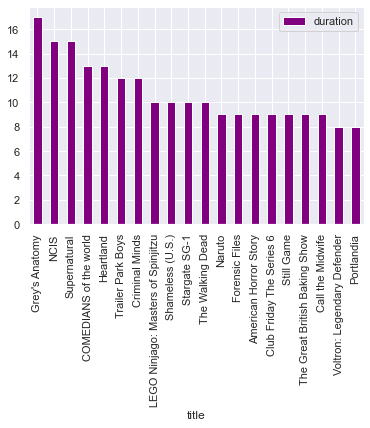

In [24]:
net_shows = data[data['type'] == 'TV Show']
features=['title','duration']
net_shows['country'] = net_shows['country'].fillna('Unknown')
net_shows['duration'] = net_shows['duration'].str.replace(' Season','')
net_shows['duration'] = net_shows['duration'].str.replace('s','')
net_shows['duration'] = net_shows['duration'].astype(str).astype(int)

t = ['title','duration']
top = net_shows[t]

top = top.sort_values(by='duration', ascending=False)
top20 = top[0:20]
top20.plot(kind='bar',x='title',y='duration', color = 'purple')

Top 20 TV Shows that has highest number of seasons are shown. Grey's Anatomy, NCIS and Supernatural are the top three tv series that have highest number of seasons.

### Model Building: Recommendation system

#### Model1 : TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) is a technique used to convert textual data into numerical form by assigning weights to individual words/terms within a document or a set of documents. It is commonly used in natural language processing and information retrieval tasks, such as text mining, document classification, and recommendation systems.

In Python, libraries like `scikit-learn` provide tools for calculating TF-IDF. This code snippet demonstrates how to transform a collection of text `data['description']` into a TF-IDF matrix using `TfidfVectorizer` from scikit-learn.

In [25]:
tfidf = TfidfVectorizer(stop_words='english')

data['description'] = data['description'].fillna('')

tfidf_matrix = tfidf.fit_transform(data['description'])


tfidf_matrix.shape

(7927, 17855)

The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate. Cosine similarity is a metric used to measure the similarity between two non-zero vectors by calculating the cosine of the angle between them.

In [26]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(data.index, index=data['title']).drop_duplicates()

In [27]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return data['title'].iloc[movie_indices]

The function `get_recommendations` is designed to provide top 10 movie recommendations based on cosine similarity scores calculated from a previously computed cosine_sim matrix.

In [28]:
get_recommendations('Peaky Blinders')

5607        Katherine Ryan: In Trouble
4307                           The Fix
5315         Ryan Hamilton: Happy Face
4664                  Age of Rebellion
1934                             Bully
5646    Jen Kirkman: Just Keep Livin’?
4235        Gina Yashere: Skinny B*tch
3547                    Back to School
8248             The Christmas Project
7583                    Night Comes On
Name: title, dtype: object

In [29]:
get_recommendations('Mortel')

2464              Grandmother's Farm Part 2
1989                                   Baby
3506                       The Hockey Girls
2418               Before the Summer Crowds
6531                                Convict
3230                              The Crime
4269                           Jojo's World
1565                   Just The Way You Are
2020                                    Dhh
3664    Anohana: The Flower We Saw That Day
Name: title, dtype: object

#### Model2 : CountVectorizer

`CountVectorizer` is a feature extraction technique, used to convert a collection of text documents into a matrix of token counts, representing the frequency of each word (or token) in the documents.

`CountVectorizer` is provided by the scikit-learn library in Python.

Creating a 'soup' or a 'bag of words' for all rows. We are using a method called `create_soup()` to combine multiple columns of the dataset into a single `soup` column.

In [30]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

data['soup'] = data.apply(create_soup, axis=1)

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(data['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
data = data.reset_index()
indices = pd.Series(data.index, index=data['title'])


def get_recommendations_new(title, cosine_sim=cosine_sim):
    title = title
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return data['title'].iloc[movie_indices]

This code defines the `get_recommendations_new()` function that takes a movie title as input and returns the top 10 recommended movies based on their similarity to the input movie, calculated using cosine similarity between their 'soup' columns.

In [31]:
get_recommendations_new('PK', cosine_sim2)

974                    3 Idiots
884            Taare Zameen Par
4241                      Sanju
6569                     Janaan
5389            Mumbai Cha Raja
6947                   No Entry
2900            Dil Dhadakne Do
109                     Shikara
4189           Paan Singh Tomar
882     Jaane Tu... Ya Jaane Na
Name: title, dtype: object

In [32]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

4532                  Kiss Me First
4747    The Frankenstein Chronicles
2804                    Giri / Haji
1997                       Get Even
5387                       Paranoid
3545                 Killer Ratings
4981                        Apaches
1810                   Criminal: UK
6907                 My Hotter Half
6736                     London Spy
Name: title, dtype: object

#### Movies or TV Shows made from books

In order to compare the Movies and TV shows with books, we need data of books. Dataset utilized for this project is provided at https://www.kaggle.com/datasets/zygmunt/goodbooks-10k/data?select=books.csv. This tabular dataset consists of listings of all books, authors,	original publication year,	original title, ratings etc. It has 10000 rows and 23 columns.

In [33]:
books['original_title'] = books['original_title'].str.lower()
data['title'] = data['title'].str.lower()

`data.merge()` performs an inner merge between the netflix data DataFrame and the books DataFrame based on the `title` column in the netflix data DataFrame and the `original_title` column in the books DataFrame. This merge operation combines the two DataFrames where the titles match, considering that titles are now in lowercase for consistency.

In [34]:
t = data.merge(books, left_on='title', right_on='original_title', how="inner")
t.head()

,index,show_id,type,title_x,director,cast,country,date_added,release_year,rating,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,86,s87,Movie,prey,Thomas Sieben,"David Kross, Hanno Koffler, Maria Ehrich, Robe...",NA,2021-09-10,2021,TV-MA,...,131352,136307,2700,2481,11391,40947,48338,33150,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
1,95,s96,TV Show,the circle,NA,Michelle Buteau,"United States, United Kingdom",2021-09-08,2021,TV-MA,...,109412,129023,17954,5667,16425,41080,44562,21289,https://images.gr-assets.com/books/1376419833m...,https://images.gr-assets.com/books/1376419833s...
2,138,s139,Movie,dear john,Lasse Hallström,"Channing Tatum, Amanda Seyfried, Richard Jenki...",United States,2021-09-01,2010,PG-13,...,441062,454781,10626,9683,25220,94711,145202,179965,https://images.gr-assets.com/books/1397749854m...,https://images.gr-assets.com/books/1397749854s...
3,171,s172,Movie,same kind of different as me,Michael Carney,"Greg Kinnear, Renée Zellweger, Djimon Hounsou,...",United States,2021-09-01,2017,PG-13,...,52964,58121,6412,712,2248,8544,18957,27660,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
4,273,s274,TV Show,gone for good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,2021-08-13,2021,TV-MA,...,29777,33482,1759,197,847,6057,14641,11740,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


224 7927


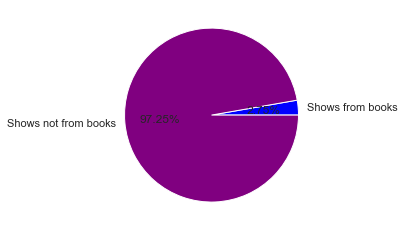

In [37]:
labels = ['Shows from books','Shows not from books']
values = [t.shape[0],data.shape[0]]
print(t.shape[0],data.shape[0])

plt.pie(values,labels = labels,colors= ['blue','purple'],autopct='%1.2f%%',startangle=360)
plt.show()

It can be seen that 224 out of 7927 shows streamed on netflix are made from books.

### Conclusion

Analysis of Netflix content data illuminates diverse facets, ranging from global content distribution to local preferences and adaptation trends. Leveraging user preferences, regional content nuances, and genre-specific trends can enhance personalized recommendations, improving user engagement and satisfaction. Analyzing the percentage of movies or TV shows on Netflix inspired by books provides valuable information about the adaptation trend. Moving forward, continual analysis and adaptation to changing trends remain pivotal in Netflix's sustained success and audience satisfaction.